In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-p65js_la because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#dm1d = pd.read_parquet("../models/anoms_sea_1d/val_predictions.pq")
dm_largeseas =  pd.read_parquet("../models/anoms_sea_large/val_predictions.pq")
dm_meanstd =  pd.read_parquet("../models/mean_std/val_predictions.pq")
dm_1d = pd.read_parquet("../models/anoms_sea_1d/val_predictions.pq")
#mlp = pd.read_parquet("../models/sota_anoms/val_predictions.pq")

In [3]:
def plot_cruises(ax, truth, cruises, labels):
    ax.plot(truth)
    for label, cruise in zip(labels, cruises):
        mean = cruise.mean(axis=1)
        std = cruise.std(axis=1)
        #ax.plot(cruise[:, 0], label=label)
        ax.plot(mean, label=label)
        ax.fill_between(np.arange(cruise.shape[0]), mean - std, mean + std, alpha=0.5)

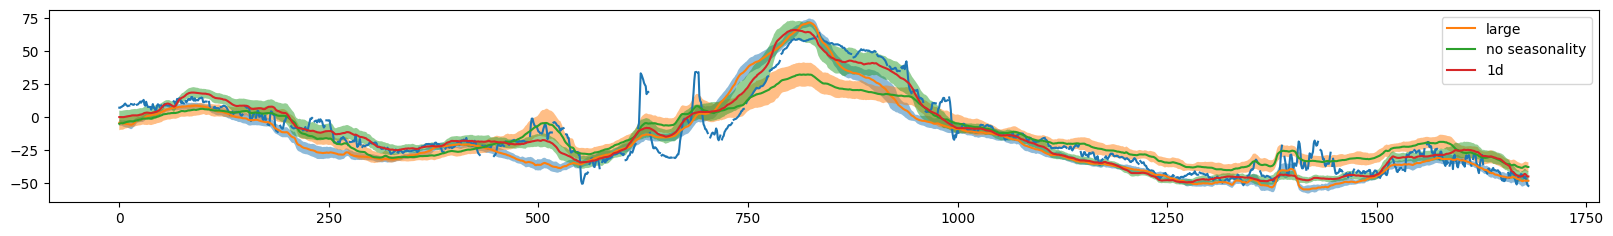

In [5]:
fig, ax = plt.subplots(figsize=(20, 2.5))
dm_samples = [f'rec_{i}' for i in range(20)]
cruises = [dm_largeseas[dm_samples].values, dm_meanstd[dm_samples].values, dm_1d[dm_samples].values]
fco2 = dm_meanstd.fco2rec_uatm.values
plot_cruises(ax, fco2, cruises , ['large', 'no seasonality', '1d'])
plt.legend()